<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/ex03_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 폐암 데이터 셋을 이용한 이진 분류
- 폴란드 브로츠와프 의과대학에서 2013년에 제공한 폐암 수술한자 데이터 셋 (2007년 ~ 2011년까지 데이터)
- 17개의 특성데이터와 1개의 라벨데이터로 구성
- 470명 데이터로 구성
- 특성종류 : 환자번호, 종양유형, 폐활량, 호기량, 신체활력상태, 통증여부, 객혈여부, 호흡곤란여부, 기침, 약화, 종양크기, 당뇨, 심근경색, 말초동맥질환, 흡연, 천식, 나이, 생존

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/사물지능A

/content/drive/MyDrive/Colab Notebooks/사물지능A


In [4]:
!ls

 data					  'ex02_퍼셉트론 만들기.ipynb'
'ex00_티쳐블머신활용 동물분류하기.ipynb'  'ex03_딥러닝 기초실습.ipynb'
'ex01_딥러닝 맛보기(학생성적예측).ipynb'


In [10]:
# 데이터 가져오기
import pandas as pd
data = pd.read_csv("./data/ThoraricSurgery.csv", header = None, index_col = 0, names=["번호", "유형", "폐활량", "호기량", "활력", "통증", "객혈", "호흡", "기침", "약화", "크기", "당뇨", "심근", "동맥", "흡연", "천식", "나이", "생존"])

In [11]:
data

,유형,폐활량,호기량,활력,통증,객혈,호흡,기침,약화,크기,당뇨,심근,동맥,흡연,천식,나이,생존
번호,,,,,,,,,,,,,,,,,
293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0


In [13]:
# 특성데이터와 라벨데이터로 분리

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X.shape, y.shape

((470, 16), (470,))

In [37]:
# 신경망 설계

from tensorflow.keras.models import Sequential # Sequential : 신경망 생성 라이브러리
from tensorflow.keras.layers import Dense, Activation # Dense : 신경망 층을 정의하는 라이브러리 / Activation : 활성화 함수를 정의하는 라이브러리

# 빈 신경망 생성
model = Sequential()

# 신경망 층을 생성해서(Dense) 신경망에 추가(add)
# 기본 신경망 층의 구성
# - 입력층 : 데이터를 입력받는 역할 (데이터의 구조, 다음층으로 넘길 크기를 결정)
# - 은닉층(중간층) : 데이터에서 특성 데이터를 추출 (여러개의 층으로 구성할 수 있음 - 입력층, 출력층 제외한 나머지는 은닉층(중간층))
# - 출력층 : 최종 데이터를 출력하는 역할 (활성화 함수가 회귀, 이진/다진분류냐에 따라 다름)

# 입력층
# units : 퍼셉트론의 수 (은닉층으로 넘겨줄 데이터의 크기 - 맘대로!)
# input_dim : 특성 데이터(입력)의 크기 (x.shape[1])
model.add(Dense(units = 44, input_dim = 16)) # units 수는 맘대로 설정하면 되는데 이진수 추천!
model.add(Activation("sigmoid"))

# 은닉층
# ANN : 은닉층 1개
# DNN : 은닉층 여러개
model.add(Dense(units = 22))
model.add(Activation("sigmoid"))

# 출력층
# units : 라벨 데이터의 수 (y의 크기)
model.add(Dense(units = 1))
# 회귀 : 활성화함수 쓰지 않음 (그냥 값 꺼내면 됨) - 쓰려면 linear
# 이진분류
#  - y를 원핫인코딩 X : sigmoid (자동으로 이진분류!)
#  - y를 원핫인코딩 O : softmax
# 다진분류 : softmax
model.add(Activation("sigmoid"))

# 모델의 구조 보기
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 44)                748       
                                                                 
 activation_9 (Activation)   (None, 44)                0         
                                                                 
 dense_10 (Dense)            (None, 22)                990       
                                                                 
 activation_10 (Activation)  (None, 22)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 23        
                                                                 
 activation_11 (Activation)  (None, 1)                 0         
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-traina

In [38]:
# 모델 컴파일

# loss : 손실함수
#  - 회귀 : mean_squared_error 또는 mse
#  - 이진분류 : binary_crossentropy
#  - 다진분류 : categorical_crossentropy
# optimizer : 최적화 함수 (경사하강법 종류)
#  - rmsprop, adam
# metrics : 평가함수
#  - loss, accuracy 또는 acc
#  - 회귀인 경우에는 metrics 옵션을 사용하지 않아도 됨
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["acc"])

In [34]:
# 파라미터(w, b)값 확인

# 초기 파라미터는 랜덤값으로 설정
print(model.get_layer("dense_6").weights)

[<tf.Variable 'dense_6/kernel:0' shape=(16, 44) dtype=float32, numpy=
array([[ 4.72791195e-02,  2.60318846e-01,  2.67762244e-02,
        -2.85294652e-01,  1.21158361e-02, -1.69861645e-01,
        -1.32776022e-01,  1.31763548e-01, -2.56591797e-01,
        -1.41322985e-01, -1.35788620e-02, -1.92033753e-01,
         2.63957292e-01,  1.03700042e-01,  8.37151110e-02,
        -7.68716335e-02, -1.01757720e-01, -2.15189606e-01,
         2.31747061e-01,  1.72989070e-01,  1.31224990e-02,
         5.69149256e-02,  2.18007773e-01,  1.11079961e-01,
         8.41962099e-02,  1.13858581e-02,  1.41850591e-01,
        -1.37463227e-01,  2.90552765e-01, -4.79428768e-02,
         1.71351284e-01, -4.52353954e-02, -6.97886050e-02,
        -4.14530039e-02, -1.92563847e-01,  1.43131703e-01,
        -1.56641498e-01, -1.70007601e-01, -3.89327705e-02,
         2.86756605e-01,  6.06859326e-02,  1.61382169e-01,
        -1.63614750e-04, -2.17872292e-01],
       [-1.63020641e-01, -9.64601189e-02,  1.65267557e-01,
  

In [39]:
# 모델 학습

h = model.fit(X, y, epochs = 3000, batch_size = 100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5/5 [==============================] - 0s 4ms/step - loss: 0.3673 - acc: 0.8532
Epoch 502/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.3680 - acc: 0.8511
Epoch 503/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.3673 - acc: 0.8489
Epoch 504/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.3693 - acc: 0.8511
Epoch 505/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.3666 - acc: 0.8532
Epoch 506/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.3683 - acc: 0.8511
Epoch 507/3000
5/5 [==============================] - 0s 5ms/step - loss: 0.3701 - acc: 0.8447
Epoch 508/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.3677 - acc: 0.8511
Epoch 509/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.3675 - acc: 0.8511
Epoch 510/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.3684 - acc: 0.8532
Epoch 511/3000
5/5 [=========

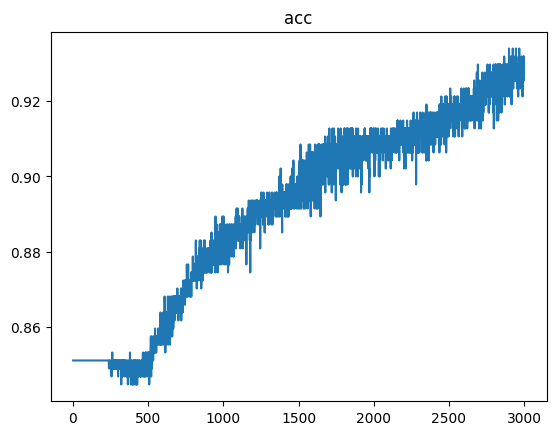

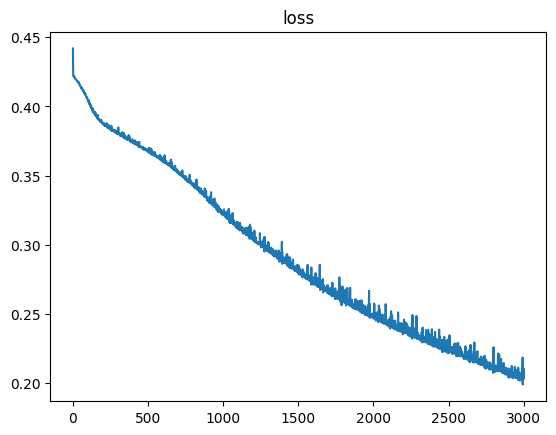

In [40]:
# 시각화하기
#  - h : epoch, loss, acc 값이 반환됨

import matplotlib.pyplot as plt
import numpy as np

# acc와 loss값 가져오기
acc = h.history["acc"]
loss = h.history["loss"]

# x축의 값을 설정
ep = np.arange(1, len(loss) + 1)

# acc와 loss 결과값을 시각화하기
plt.title("acc")
plt.plot(ep, acc)
plt.show()

plt.title("loss")
plt.plot(ep, loss)
plt.show()

# 폐암 데이터 셋을 이용한 이진분류 (y를 원핫인코딩)

In [43]:
y_en = pd.get_dummies(y)

y.shape, y_en.shape

((470,), (470, 2))

In [46]:
y_en

,0,1
번호,,
293,1,0
1,1,0
8,0,1
14,0,1
17,1,0
...,...,...
98,1,0
369,1,0
406,1,0


In [45]:
# 신경망 설계

model2 = Sequential()

# 입력층
model2.add(Dense(units = 32, input_dim = 16))
model2.add(Activation("sigmoid"))

# 은닉층
model2.add(Dense(units = 36))
model2.add(Activation("sigmoid"))

# 출력층
model2.add(Dense(units = 2))
model2.add(Activation("softmax"))

# 모델의 구조 보기
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 activation_12 (Activation)  (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 36)                1188      
                                                                 
 activation_13 (Activation)  (None, 36)                0         
                                                                 
 dense_14 (Dense)            (None, 2)                 74        
                                                                 
 activation_14 (Activation)  (None, 2)                 0         
                                                                 
Total params: 1,806
Trainable params: 1,806
Non-traina

In [51]:
# 모델 컴파일

model2.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["acc"]) # accuracy 대신 acc 쓰다가 에러 발생할 수도 있음!

In [52]:
# 모델 학습

h2 = model2.fit(X, y_en, epochs = 300, batch_size = 20)

Epoch 1/300
24/24 [==============================] - 1s 2ms/step - loss: 0.4280 - acc: 0.8511
Epoch 2/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4213 - acc: 0.8511
Epoch 3/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4223 - acc: 0.8511
Epoch 4/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4221 - acc: 0.8511
Epoch 5/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4212 - acc: 0.8511
Epoch 6/300
24/24 [==============================] - 0s 3ms/step - loss: 0.4214 - acc: 0.8511
Epoch 7/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4209 - acc: 0.8511
Epoch 8/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4204 - acc: 0.8511
Epoch 9/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4211 - acc: 0.8511
Epoch 10/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4207 - acc: 0.8511
Epoch 11/300
24/24 [==============================] - 0s 2m

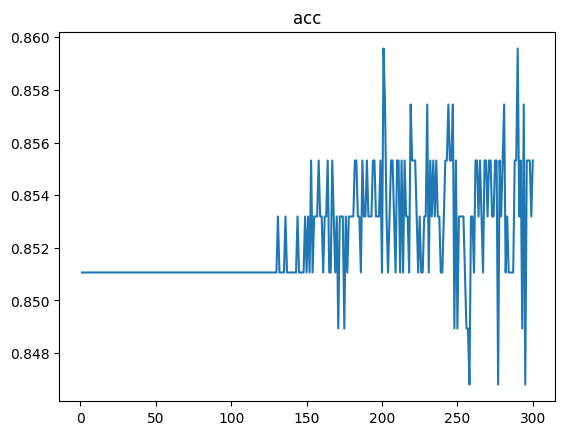

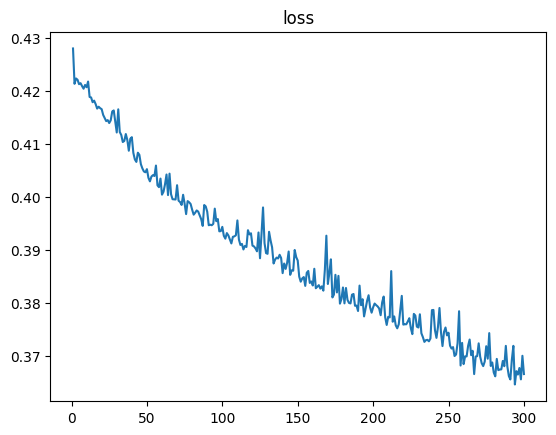

In [53]:
# 시각화하기

# acc와 loss값 가져오기
acc2 = h2.history["acc"]
loss2 = h2.history["loss"]

# x축의 값을 설정
ep2 = np.arange(1, len(loss2) + 1)

# acc와 loss 결과값을 시각화하기
plt.title("acc")
plt.plot(ep2, acc2)
plt.show()

plt.title("loss")
plt.plot(ep2, loss2)
plt.show()